#### 1. Buatlah model klasifikasi dengan menggunakan SVM untuk data suara, voice.csv.

##### Langkah 1 - Import Library

In [80]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

##### Langkah 2 - Baca Data

In [81]:
data = pd.read_csv('voice.csv', encoding='latin-1') # spesifiksi encoding␣
# Tampilkan beberapa baris data
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


##### Langkah 3 - Analisis Bentuk Data

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [83]:
data.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

Dari hasil yang didapat data label bertipe object sehingga perlu dilakukan encoding

##### Langkah 4 - Encode Label

In [84]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
le = LabelEncoder()
data['label'] = le.fit_transform(data['label'])
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


##### Langkah 5 - Melihat Korelasi

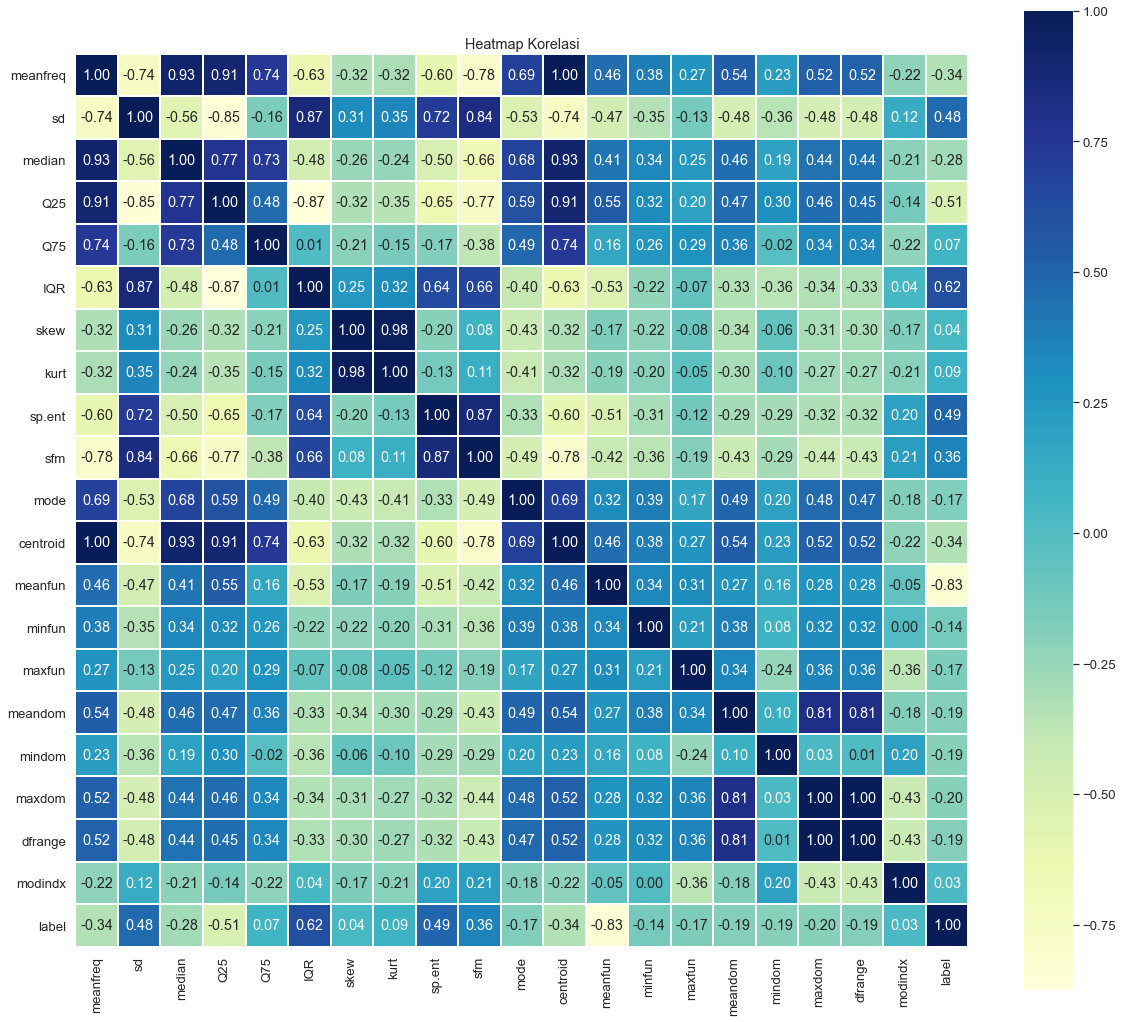

In [85]:
plt.figure(figsize=(20, 18))
corr_matrix = data.corr()
sns.set(font_scale=1.2)
sns.heatmap(corr_matrix, cmap='YlGnBu', linewidths=1, fmt=".2f", annot=True,cbar=True, square=True)
plt.title('Heatmap Korelasi')
plt.show()

##### Langkah 6 - Membuat Model SVM

In [86]:
from sklearn.svm import SVC
from sklearn import metrics
svc = SVC()
svm_classifier = SVC(kernel='linear')

In [87]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop(['label'], axis=1))
scaled_features

array([[-4.04924806,  0.4273553 , -4.22490077, ..., -1.43142165,
        -1.41913712, -1.45477229],
       [-3.84105325,  0.6116695 , -3.99929342, ..., -1.41810716,
        -1.4058184 , -1.01410294],
       [-3.46306647,  1.60384791, -4.09585052, ..., -1.42920257,
        -1.41691733, -1.06534356],
       ...,
       [-1.29877326,  2.32272355, -0.05197279, ..., -0.5992661 ,
        -0.58671739,  0.17588664],
       [-1.2452018 ,  2.012196  , -0.01772849, ..., -0.41286326,
        -0.40025537,  1.14916112],
       [-0.51474626,  2.14765111, -0.07087873, ..., -1.27608595,
        -1.2637521 ,  1.47567886]])

##### Langkah 7 - Melakukan Split Data
Melakukan split data menjadi data latih dan data uji dengan perbandingan 80:20

In [88]:
from sklearn.model_selection import train_test_split
X = scaled_features
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1000)

In [89]:
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

##### Langkah 8 - Melakukan Evaluasi Model

In [90]:
from sklearn.metrics import accuracy_score, classification_report
# Memprediksi label pada data uji
svm_model = SVC(kernel='linear', C=5)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
svc.fit(X_train, y_train)
# Menghitung Akurasi
y_pred = svc.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {int(accuracy * 100)}%')
# Membuat Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy Score: 98%
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       299
           1       0.98      0.99      0.99       335

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



#### 2. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
• Menggunakan data spam.csv

• Fitur CountVectorizer dengan mengaktifkan stop_words -Evaluasi hasilnya

##### Langkah 1 - Import Library dan Baca Data

In [105]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


In [106]:
data_spam = pd.read_csv("spam.csv", encoding="latin-1")
data_spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


##### Langkah 2 - Analisis Bentuk Data

In [92]:
data_spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [93]:
data_spam.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""",GE,"GNT:-)"""
freq,4825,30,3,2,2


In [94]:
data_spam.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [95]:
# Menghapus kolom yg tidak digunakan
data = data.drop(data.iloc[:,2:], axis=1)
data.head()

,meanfreq,sd
0,0.059781,0.064241
1,0.066009,0.067310
2,0.077316,0.083829
3,0.151228,0.072111
4,0.135120,0.079146


In [96]:
data_spam.drop(data_spam.iloc[:, 2:], axis=1, inplace=True)
data_spam.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [97]:
# Mengubah nama kolom V1 dan V2
new_cols = {
'v1': 'Labels',
'v2': 'SMS'
}
data_spam = data_spam.rename(columns=new_cols)
data_spam.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [98]:
# Inspeksi Data
print(data_spam['Labels'].value_counts())
print('\n')
print(data_spam.info())
print('\n')
print(data_spam.describe())

ham     4825
spam     747
Name: Labels, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Labels  5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


       Labels                     SMS
count    5572                    5572
unique      2                    5169
top       ham  Sorry, I'll call later
freq     4825                      30


##### Langkah 3 - Encoding Label

In [99]:
new_labels = {
'spam': 1,
'ham': 0
}
data_spam['Labels'] = data_spam['Labels'].map(new_labels)
data_spam.head()

,Labels,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


##### Langkah 4 - Memisah Fitur dengan Label

In [100]:
X = data_spam['SMS'].values
y = data_spam['Labels'].values

In [109]:
# Memisahkan Data Train dan Data Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [110]:
# Ekstraksi Fitur dengan CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [112]:
print(len(vectorizer.get_feature_names()))
print(f'Data Dimension: {X_train.shape}')

7466
Data Dimension: (4457, 7466)


In [115]:
# Training Model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [116]:
# Prediksi Model
y_pred_train = nb_model.predict(X_train)
acc_train = accuracy_score(y_train, y_pred_train)
y_pred_test = nb_model.predict(X_test)
acc_test = accuracy_score(y_test, y_pred_test)
print(f'Accuracy Data Train: {acc_train}')
print(f'Accuracy Data Test: {acc_test}')
accuracyCount = metrics.accuracy_score(y_test, y_pred_test)
print(f'Accuracy Score: {int(accuracy * 100)}%')
report = classification_report(y_test, y_pred_test)
print("Classification Report:\n", report)

Accuracy Data Train: 0.9946152120260264
Accuracy Data Test: 0.9829596412556054
Accuracy Score: 98%
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       954
           1       0.98      0.90      0.94       161

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



#### 3. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
• Menggunakan data spam.csv

• Fitur TF-IDF dengan mengaktifkan stop_words

• Evaluasi hasilnya dan bandingkan dengan hasil pada Tugas no 2.

• Berikan kesimpulan fitur mana yang terbaik pada kasus data spam.csv

##### Langkah 1 - Import Data

In [117]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

##### Langkah 2 - Load Data


In [118]:
# Baca data dari file CSV
data_spam = pd.read_csv("spam.csv", encoding="latin-1")
data_spam = data_spam.drop(data_spam.iloc[:, 2:], axis=1)
data_spam.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [119]:
# Ubah Nama Kolom V1 dan V2

new_cols = {
'v1': 'Labels',
'v2': 'SMS'
}
data_spam = data_spam.rename(columns=new_cols)
data_spam.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [120]:
# Inspeksi Data

print(data_spam['Labels'].value_counts())
print('\n')
print(data_spam.info())
print('\n')
print(data_spam.describe())

ham     4825
spam     747
Name: Labels, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Labels  5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


       Labels                     SMS
count    5572                    5572
unique      2                    5169
top       ham  Sorry, I'll call later
freq     4825                      30


In [121]:
# Mengubah label menjadi angka 1 atau 0

new_labels = {
'spam': 1,
'ham': 0
}
data_spam['Labels'] = data_spam['Labels'].map(new_labels)
data_spam.head()

,Labels,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [122]:
# Memisahkan fitur dengan label

X = data_spam['SMS'].values
y = data_spam['Labels'].values

In [123]:
# Memisahkan data train dan data test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [124]:
# Ekstraksi fitur dengan TF-IDF

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [126]:
print(len(tfidf_vectorizer.get_feature_names()))
print(f'Data Dimension: {X_train_tfidf.shape}')

7466
Data Dimension: (4457, 7466)


#### Langkah 3 - Training Model Multinominal Naive Bayes dengan TF-IDF

In [127]:
nb_model_tfidf = MultinomialNB()
nb_model_tfidf.fit(X_train_tfidf, y_train)

MultinomialNB()

#### Langkah 4 - Melakukan Evaluasi Model

In [128]:
y_pred_train_tfidf = nb_model.predict(X_train_tfidf)
acc_train = accuracy_score(y_train, y_pred_train)
y_pred_test = nb_model.predict(X_test_tfidf)
acc_test = accuracy_score(y_test, y_pred_test)
print(f'Accuracy Data Train: {acc_train}')
print(f'Accuracy Data Test: {acc_test}')
accuracyTF = metrics.accuracy_score(y_test, y_pred_test)
print(f'Accuracy Score: {int(accuracy * 100)}%')
report = classification_report(y_test, y_pred_test)
print("Classification Report:\n", report)

Accuracy Data Train: 0.9946152120260264
Accuracy Data Test: 0.9757847533632287
Accuracy Score: 98%
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       954
           1       1.00      0.83      0.91       161

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.97      1115



#### Kesimpulan
Akurasi dari penggunaan CountVectorizer dan TF-IDF Vectorizer : - CountVectorizer :
0.9829596412556054 - TF-IDF Vectorizer : 0.9757847533632287
Dapat dilihat, akurasi dari penggunaan CoutVectorizer dan TF-IDF Vectorizer relatif sama
meskipun akurasi pada CountVectorizer lebih tinggi sedikit.

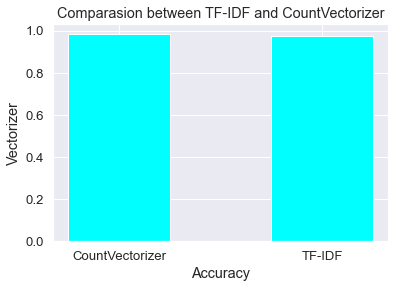

In [129]:
plt.bar(['CountVectorizer', 'TF-IDF'], [accuracyCount, accuracyTF], color='cyan', width=0.5)
plt.title('Comparasion between TF-IDF and CountVectorizer')
plt.xlabel('Accuracy')
plt.ylabel('Vectorizer')
plt.show()